In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("exchange_rate.csv", header=0)
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [11]:
df.shape

(7588, 2)

In [12]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [13]:
# Tell pandas that the day comes first in your date format
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')


In [14]:
df['date'].min(), df['date'].max()

(Timestamp('1990-01-01 00:00:00'), Timestamp('2010-10-10 00:00:00'))

In [15]:
df = df.sort_values('date', ascending=True)
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

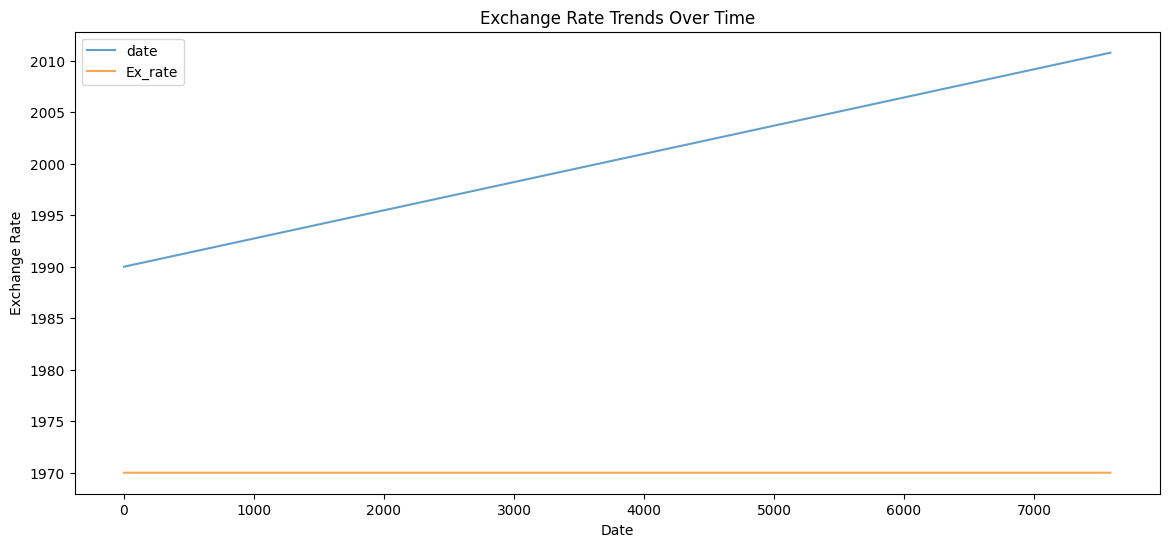

In [16]:
# 2. Initial exploration - plot all currency time series
plt.figure(figsize=(14,6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col, alpha=0.7)

plt.title("Exchange Rate Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend(loc="best")
plt.show()

In [17]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [18]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [19]:
df['date'].value_counts()

date
1990-01-01    1
2003-11-03    1
2003-11-15    1
2003-11-14    1
2003-11-13    1
             ..
1996-11-30    1
1996-11-29    1
1996-11-28    1
1996-11-27    1
2010-10-10    1
Name: count, Length: 7588, dtype: int64

In [20]:
df = df.groupby('date')['Ex_rate'].sum().reset_index()
df.shape

(7588, 2)

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df = df.set_index('date')

In [23]:
y = df['Ex_rate'].resample("M").mean()

/var/folders/zk/mcgqv2y957xdqknpknhdslc80000gn/T/ipykernel_26468/1397780627.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = df['Ex_rate'].resample("M").mean()


In [24]:
print(y.shape)

(250,)


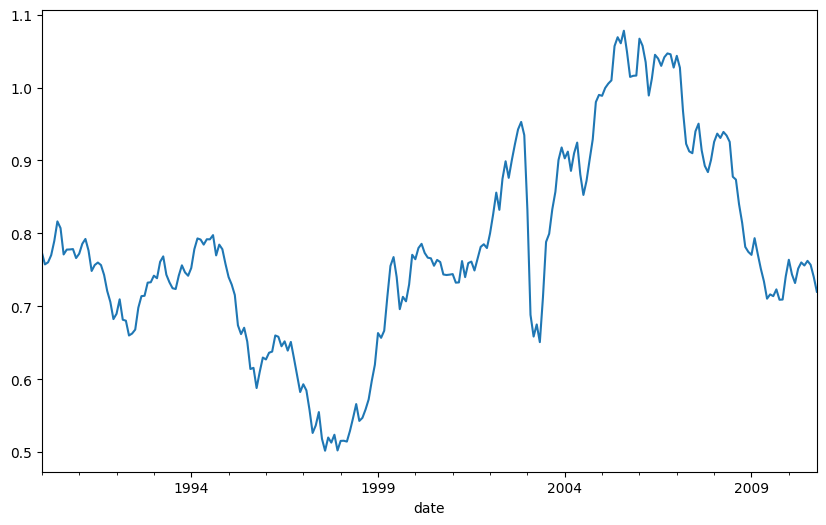

In [25]:
y.plot(figsize=(10,6))
plt.show()

In [26]:
df.tail()

,Ex_rate
date,
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197
2010-10-09,0.720825
2010-10-10,0.720825


In [27]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [28]:
train = y.loc[:"2003-12-31"]
print(train.shape)
train

(168,)


date
1990-01-31    0.773874
1990-02-28    0.757486
1990-03-31    0.760365
1990-04-30    0.770110
1990-05-31    0.789684
                ...   
2003-08-31    0.799465
2003-09-30    0.832997
2003-10-31    0.857130
2003-11-30    0.900672
2003-12-31    0.917858
Freq: ME, Name: Ex_rate, Length: 168, dtype: float64

In [29]:
test = y.loc['2004-1-31':]
print(test.shape)
test

(82,)


date
2004-01-31    0.902951
2004-02-29    0.912124
2004-03-31    0.885774
2004-04-30    0.909828
2004-05-31    0.924563
                ...   
2010-06-30    0.755970
2010-07-31    0.762316
2010-08-31    0.756920
2010-09-30    0.740409
2010-10-31    0.719946
Freq: ME, Name: Ex_rate, Length: 82, dtype: float64

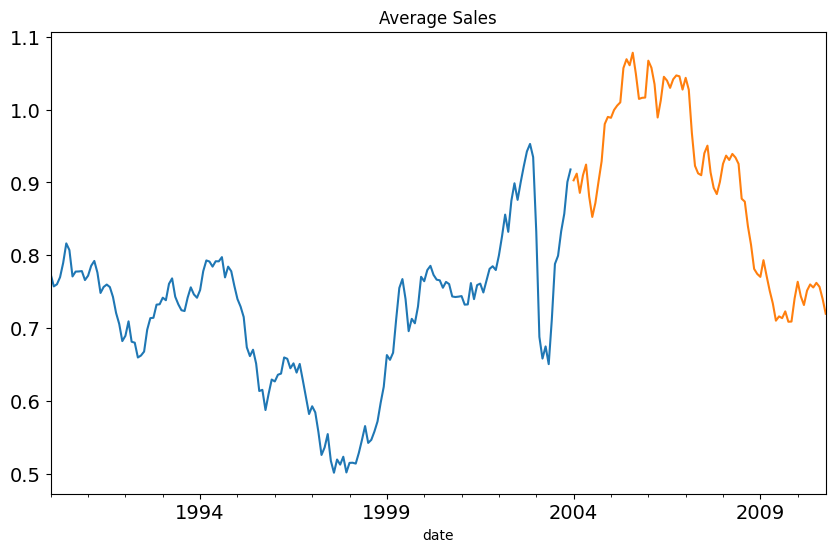

In [30]:
train.plot(figsize=(10,6), title="Average Sales", fontsize=14)
test.plot(figsize=(10,6),title="Average Sales", fontsize=14)
plt.show()

Part 2: Model Building - ARIMA

Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

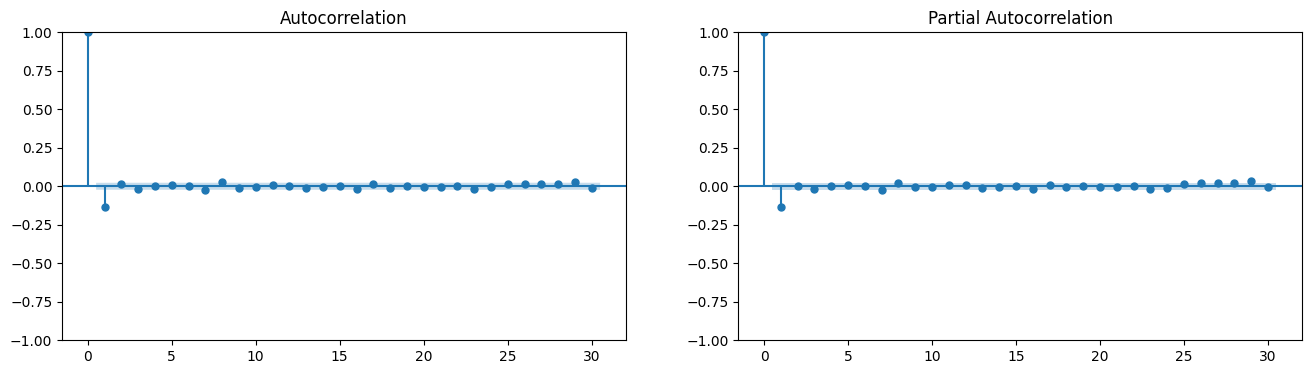

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(df.diff().dropna(), lags=30, ax=axes[0])
plot_pacf(df.diff().dropna(), lags=30, ax=axes[1])
plt.show()

Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Assume we estimated (p=1, d=1, q=1) from ACF/PACF
model = ARIMA(df, order=(1,1,1))
results = model.fit()

print(results.summary())

/opt/anaconda3/envs/ai/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ai/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ai/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 16 Oct 2025   AIC                         -56102.322
Time:                        19:17:12   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

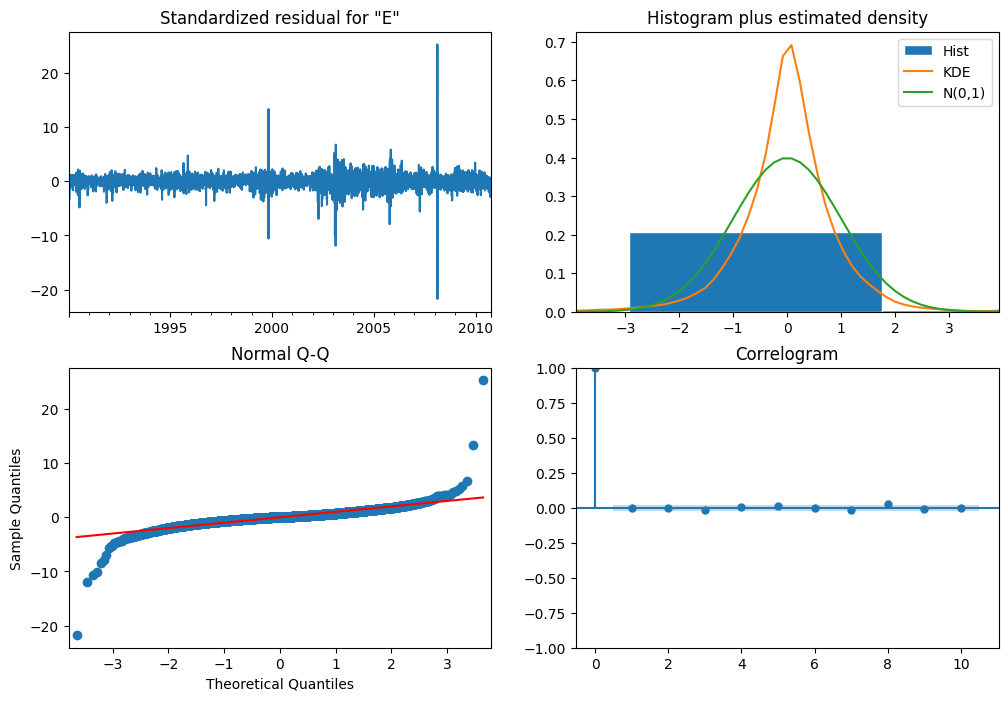

In [33]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

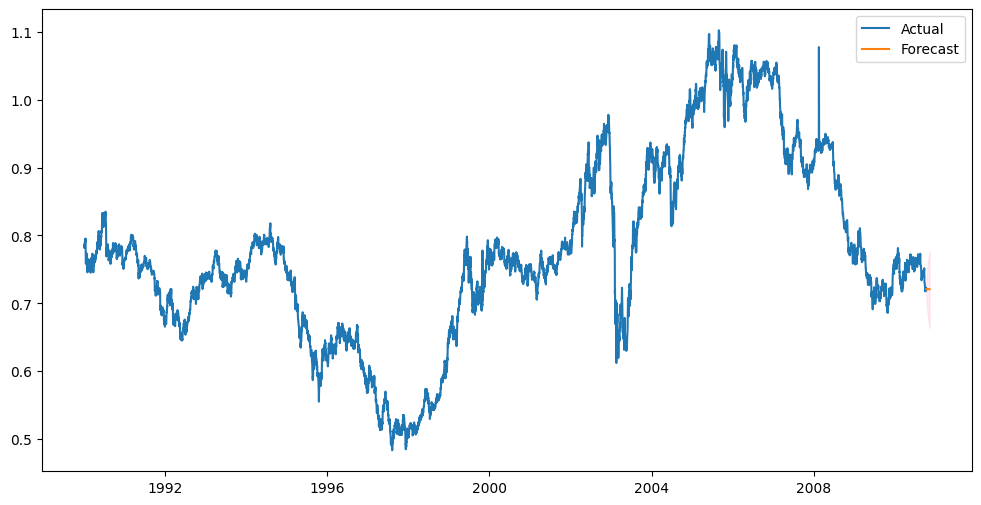

In [34]:
# Forecast next 30 days
n_forecast = 30
forecast = results.get_forecast(steps=n_forecast)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df.index, df, label="Actual")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label="Forecast")
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:,0], 
                 forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()

Part 3: Model Building - Exponential Smoothing

Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

/opt/anaconda3/envs/ai/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


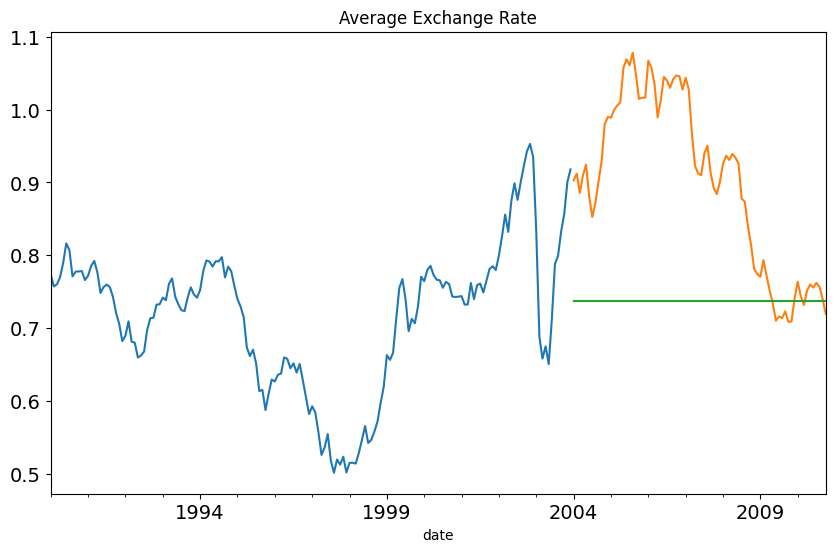

In [35]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_smooth = test.copy()

fit1 = SimpleExpSmoothing(train).fit(smoothing_level = 0.01)
Exp_smooth['SES'] = fit1.forecast(steps = len(test))

train.plot(figsize=(10,6), title = "Average Exchange Rate", fontsize=14)
test.plot(figsize=(10,6), title="Average Exchange Rate", fontsize=14)
Exp_smooth['SES'].plot(figsize=(10,6), title = "Average Exchange Rate", fontsize = 14)
plt.show()

In [36]:
fit1.aic

np.float64(-765.9816745724316)

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(test, Exp_smooth.SES))
print(rmse)

0.20143587385955006


Holt Linear

/var/folders/zk/mcgqv2y957xdqknpknhdslc80000gn/T/ipykernel_26468/2355992776.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level = 0.01, smoothing_slope = 0.5)
/opt/anaconda3/envs/ai/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


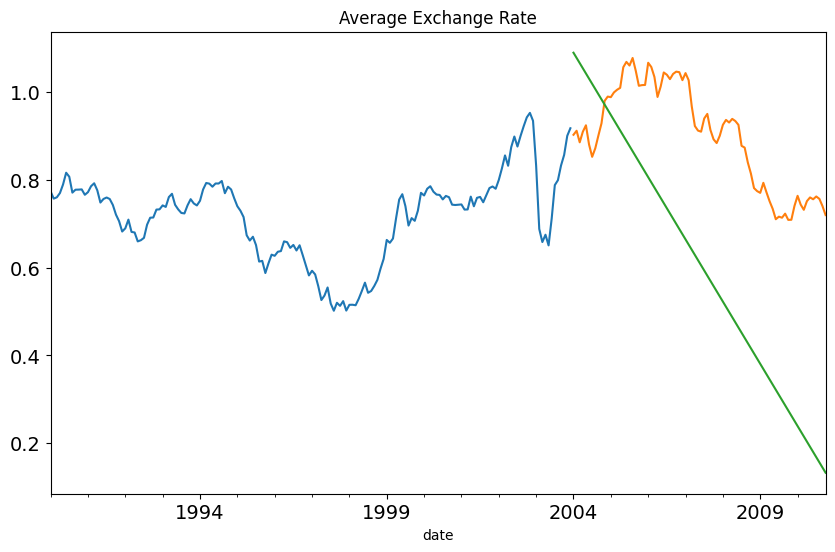

In [38]:
from statsmodels.tsa.api import Holt
Holt_df= test.copy()
fit1 = Holt(train).fit(smoothing_level = 0.01, smoothing_slope = 0.5)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title="Average Exchange Rate", fontsize=14)
test.plot(figsize=(10,6), title="Average Exchange Rate", fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title = "Average Exchange Rate", fontsize = 14)
plt.show()


In [39]:
fit1.aic

np.float64(-514.0044299897721)

In [40]:
Holt_df['Holt_linear']

2004-01-31    1.089957
2004-02-29    1.078139
2004-03-31    1.066322
2004-04-30    1.054504
2004-05-31    1.042687
                ...   
2010-06-30    0.180004
2010-07-31    0.168186
2010-08-31    0.156369
2010-09-30    0.144551
2010-10-31    0.132734
Freq: ME, Length: 82, dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rmse)

0.3566092110274322


Hold - Winter Model

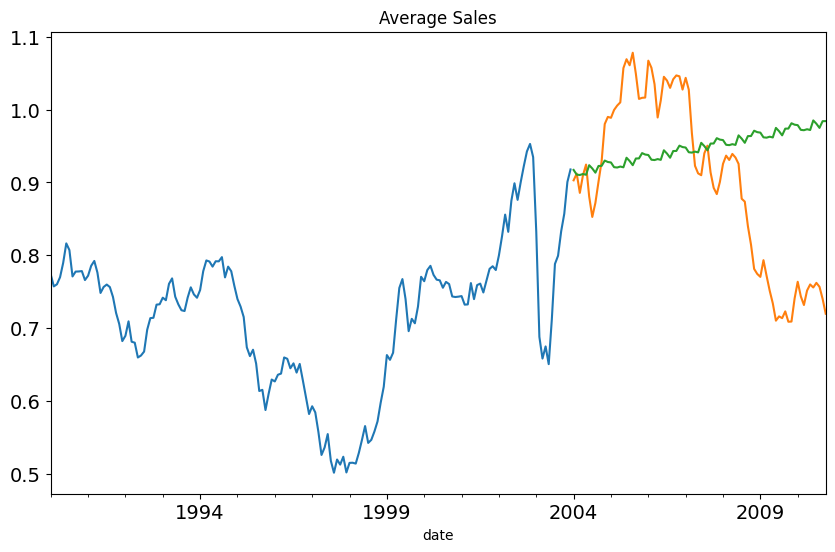

In [42]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_winter_df = test.copy()

fit1 = ExponentialSmoothing(train, seasonal_periods=12, 
                            trend='add', 
                            seasonal='add').fit()
Holt_winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title="Average Sales", fontsize=14)
test.plot(figsize=(10,6), title="Average Sales", fontsize=14)
Holt_winter_df["Holt_Winter"].plot(figsize = (10,6), title = "Average Sales", fontsize = 14)
plt.show()


Conclusion

ARIMA: Captures autocorrelation patterns; better for short-term forecasts; requires stationarity and careful parameter tuning.

Exponential Smoothing: Captures trend and seasonality; simpler, faster; less flexible for complex autocorrelations.

Evaluation Metrics: Compare MAE, RMSE, MAPE to determine best performing model.